In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
width = 50
height = 50
train_data = keras.utils.image_dataset_from_directory(
    directory="images/train",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(width,height)
)

val_data = keras.utils.image_dataset_from_directory(
    directory="images/validation",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(width,height)
)


Found 60000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [3]:
def process(image,label):
    image=tf.cast(image/255, tf.float32)
    return image,label

train_data = train_data.map(process)
val_data = val_data.map(process)

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=(width,height,3)))

model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3,3), activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [5]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])

In [6]:
checkpoint_callback = ModelCheckpoint("model50.h5", monitor="val_loss", save_best_only=True, mode="min")
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [7]:
history = model.fit(train_data, epochs=30, validation_data=val_data, callbacks=[checkpoint_callback, early_stopping])

Epoch 1/30


1875/1875 [==============================] - 537s 284ms/step - loss: 0.6114 - accuracy: 0.6953 - val_loss: 0.5308 - val_accuracy: 0.7140
Epoch 2/30


c:\Users\zivad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 353s 188ms/step - loss: 0.4479 - accuracy: 0.7903 - val_loss: 0.5436 - val_accuracy: 0.7540
Epoch 3/30
1875/1875 [==============================] - 349s 186ms/step - loss: 0.3730 - accuracy: 0.8297 - val_loss: 0.3402 - val_accuracy: 0.8480
Epoch 4/30
1875/1875 [==============================] - 353s 188ms/step - loss: 0.3199 - accuracy: 0.8571 - val_loss: 0.3576 - val_accuracy: 0.8546
Epoch 5/30
1875/1875 [==============================] - 349s 186ms/step - loss: 0.2767 - accuracy: 0.8782 - val_loss: 0.3660 - val_accuracy: 0.8388
Epoch 6/30
1875/1875 [==============================] - 347s 185ms/step - loss: 0.2413 - accuracy: 0.8960 - val_loss: 0.3859 - val_accuracy: 0.8548


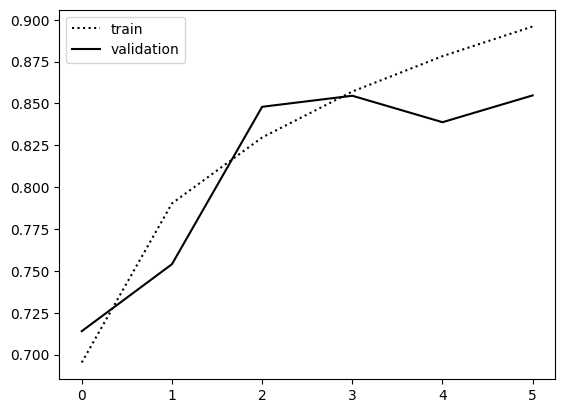

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], linestyle='dotted',color='black', label='train')
plt.plot(history.history['val_accuracy'], linestyle='solid',color='black', label='validation')
plt.legend()
plt.show()

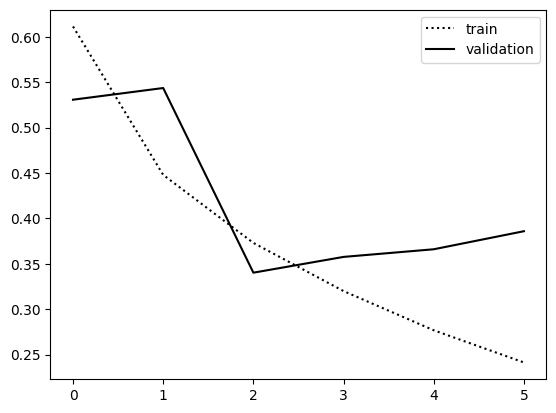

In [12]:
plt.plot(history.history['loss'], linestyle='dotted', color='black', label='train')
plt.plot(history.history['val_loss'], linestyle='solid', color='black', label='validation')
plt.legend()
plt.show()